In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

import time

In [32]:
def print_arrs(*args):
    splits = [arg.__str__().split('\n') for arg in args]

    for lines in zip(*splits):
        print("   ".join(lines))

In [54]:
base = np.arange(7*7).reshape(7,7)

maskl = np.zeros((2,6), dtype=int)
maskr = maskl.copy()

maskl[0,0]=1
maskr[-1,-1]=1
print(base)
print()
print_arrs(maskl, maskr)

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]
 [42 43 44 45 46 47 48]]

[[1 0 0]   [[0 0 0]
 [0 0 0]]    [0 0 1]]


In [55]:
#signal.convolve2d(base, mask, boundary='wrap', mode='same').astype(int)

# for convolve (faster than correlation) mask have to be fliped (180 rotation)
flip_l = maskl[::-1,::-1]
flip_r = maskr[::-1,::-1]

resl = signal.convolve2d(base, flip_l, boundary='wrap', mode='same').astype(int)
resr = signal.convolve2d(base, flip_r, boundary='wrap', mode='same').astype(int)

print_arrs(resl, resr)

resl = signal.convolve2d(base, flip_l, boundary='wrap', mode='full').astype(int)
resr = signal.convolve2d(base, flip_r, boundary='wrap', mode='full').astype(int)
print()
print()
print_arrs(resl, resr)

[[48 42 43 44 45 46 47]   [[ 1  2  3  4  5  6  0]
 [ 6  0  1  2  3  4  5]    [ 8  9 10 11 12 13  7]
 [13  7  8  9 10 11 12]    [15 16 17 18 19 20 14]
 [20 14 15 16 17 18 19]    [22 23 24 25 26 27 21]
 [27 21 22 23 24 25 26]    [29 30 31 32 33 34 28]
 [34 28 29 30 31 32 33]    [36 37 38 39 40 41 35]
 [41 35 36 37 38 39 40]]    [43 44 45 46 47 48 42]]


[[47 48 42 43 44 45 46 47 48]   [[ 0  1  2  3  4  5  6  0  1]
 [ 5  6  0  1  2  3  4  5  6]    [ 7  8  9 10 11 12 13  7  8]
 [12 13  7  8  9 10 11 12 13]    [14 15 16 17 18 19 20 14 15]
 [19 20 14 15 16 17 18 19 20]    [21 22 23 24 25 26 27 21 22]
 [26 27 21 22 23 24 25 26 27]    [28 29 30 31 32 33 34 28 29]
 [33 34 28 29 30 31 32 33 34]    [35 36 37 38 39 40 41 35 36]
 [40 41 35 36 37 38 39 40 41]    [42 43 44 45 46 47 48 42 43]
 [47 48 42 43 44 45 46 47 48]]    [ 0  1  2  3  4  5  6  0  1]]


[[0.00055307 0.01181018 0.0327653  0.01181018 0.00055307]
 [0.00425695 0.09090167 0.25219094 0.09090167 0.00425695]
 [0.00425695 0.09090167 0.25219094 0.09090167 0.00425695]
 [0.00055307 0.01181018 0.0327653  0.01181018 0.00055307]]


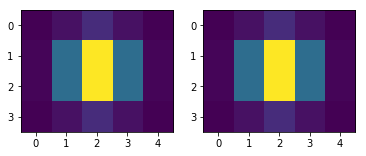

In [160]:
# gaussian check

dx = 1.0
sigma = 1.4/2.0
sigma2 = np.square(sigma)
gauss_cutoff = 0.2
gauss_r = np.sqrt(-2*sigma2*np.log(gauss_cutoff))

odd_axis = int(np.ceil(gauss_r/dx))*2 + 1
even_axis = int(np.ceil((gauss_r-dx*0.5)/dx))*2 + 2
# shape deterimnation // asuming x-slope (odd, even) / y-slope (even, odd)

odd_edge = odd_axis//2
odd_range = np.linspace(-odd_edge, odd_edge, odd_axis)

even_edge = even_axis//2-0.5*dx
even_range = np.linspace(-even_edge, even_edge, even_axis)

#xx, yy = np.meshgrid(even_range,odd_range)
xx, yy = np.meshgrid(odd_range, even_range)

g_value = np.exp(-(np.square(xx) + np.square(yy))/(2*sigma2))
g_value = g_value/np.sum(g_value)

print(g_value)
plt.subplot(1,2,1)
plt.imshow(g_value)
plt.subplot(1,2,2)
plt.imshow(g_value[::-1,::1])

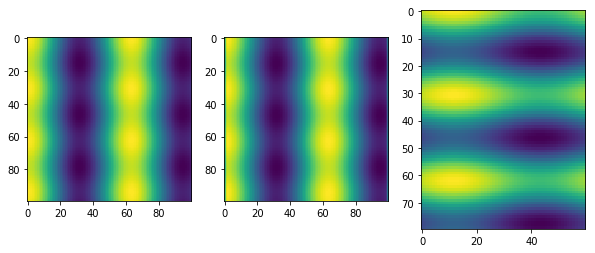

In [148]:
bx, by = np.meshgrid(np.arange(100), np.arange(100))
plane = np.cos(bx*0.1)+0.1*np.cos(by*0.2)


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(plane)


conv_plane = signal.convolve2d(plane, g_value, boundary='wrap', mode='same')
plt.subplot(1,3,2)
plt.imshow(conv_plane)

plt.subplot(1,3,3)
plt.imshow((conv_plane-plane)[10:-10, 20:-20])

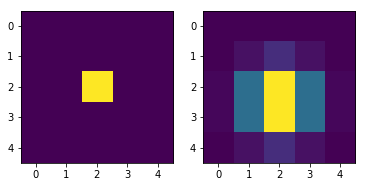

In [161]:
width = 5
plane = np.zeros((width, width), dtype=float)
plane[width//2, width//2] = 1

plt.subplot(1,2,1)
plt.imshow(plane)

conv_plane = signal.convolve2d(plane, g_value, boundary='wrap', mode='same')
plt.subplot(1,2,2)
plt.imshow(conv_plane)